# Importing packages

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import ipywidgets as widgets
import plotly.express as px
import seaborn as sns

In [52]:
df=pd.read_csv('titanic.csv',index_col=None)

In [53]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for nulls

In [54]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###     EDA

In [55]:
df.shape

(891, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df.drop('Cabin',axis=1,inplace=True)

In [59]:
# Fill missing values in the 'Age' and 'Embarked' column using the mode
age_mode = df['Age'].mode()[0]
df['Age'].fillna(age_mode, inplace=True)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)



In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

******************************************************************************************

### Variables distribution

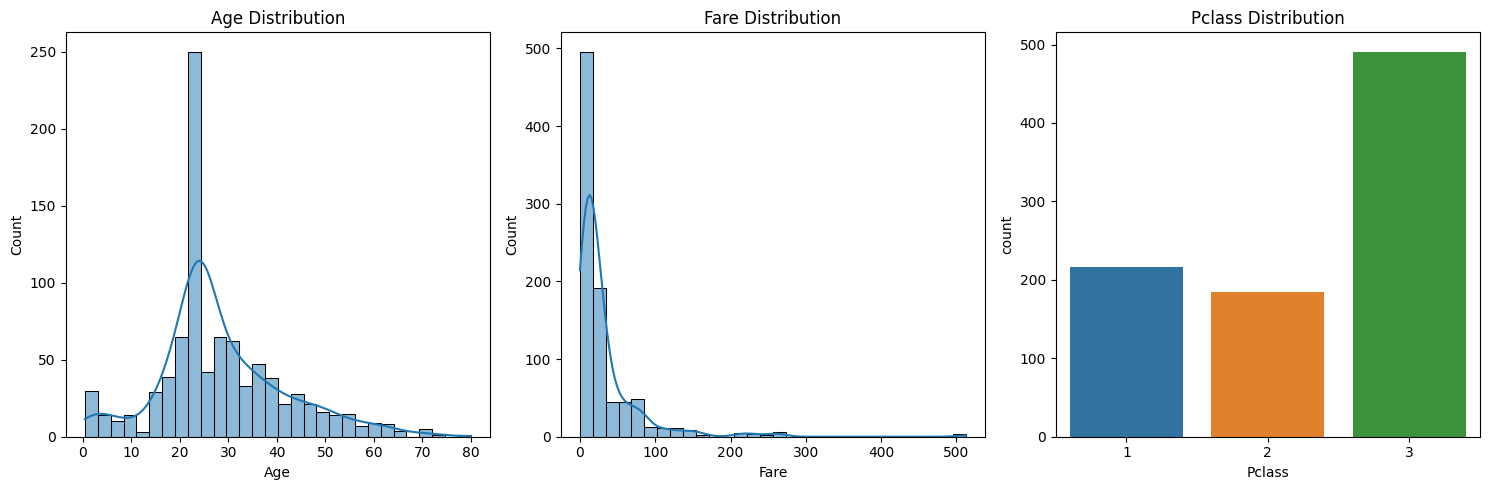

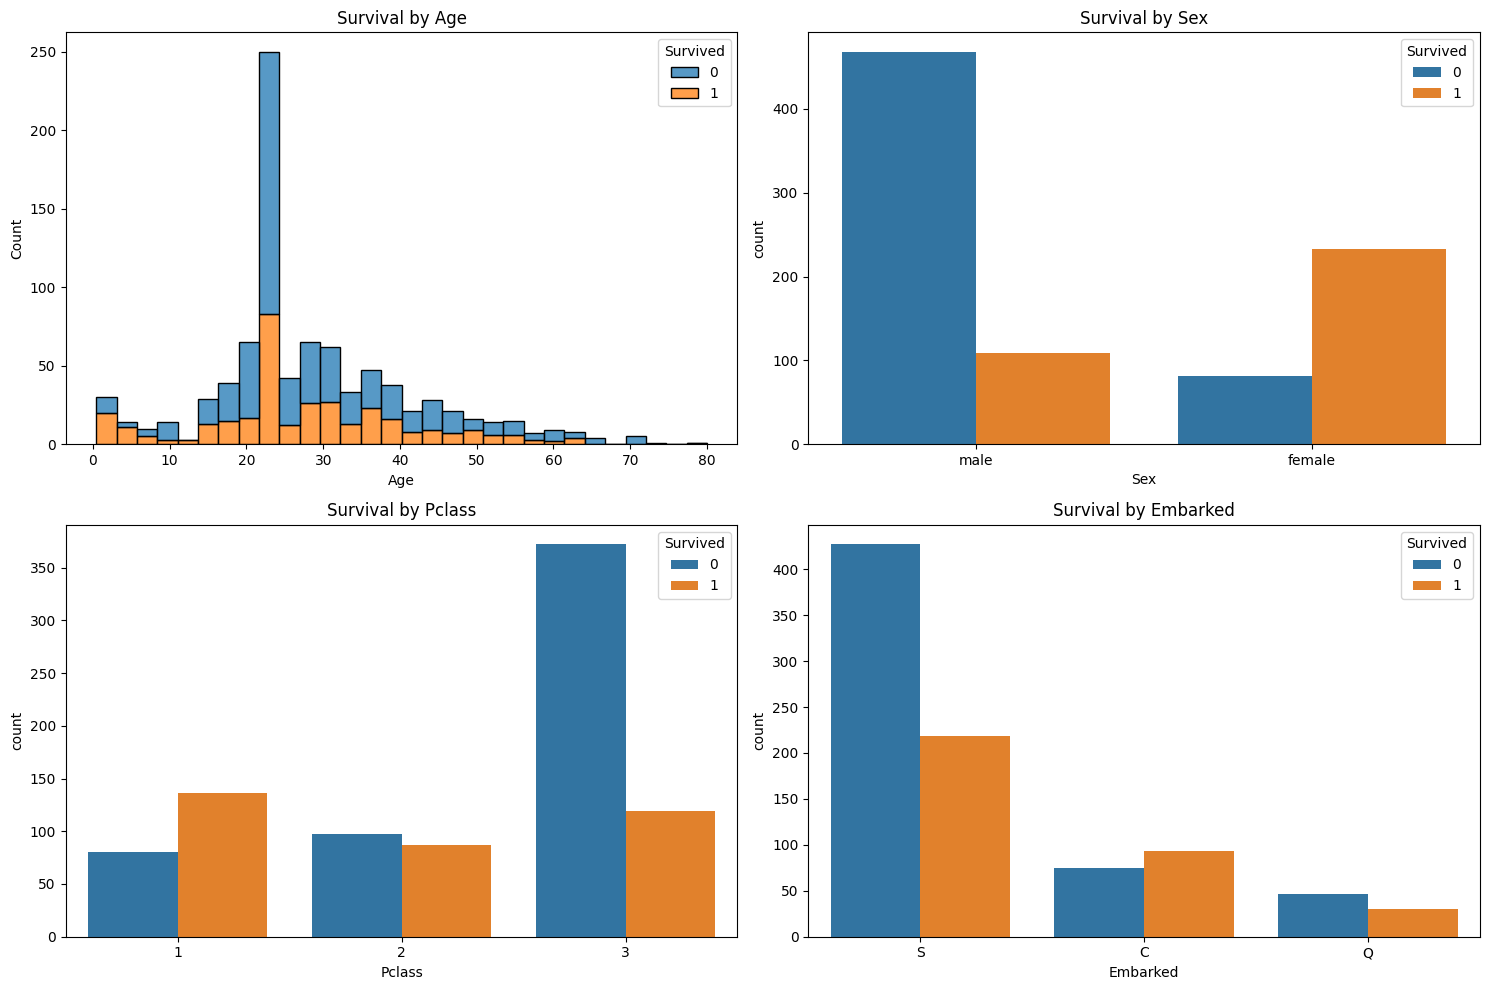

In [75]:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Fare distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

# Pclass distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')

plt.tight_layout()
plt.show()

# Survival analysis
plt.figure(figsize=(15, 10))

# Survival by Age
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival by Age')

# Survival by Sex
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')

# Survival by Pclass
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')

# Survival by Embarked
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')

plt.tight_layout()
plt.show()

### Histogram of death count wrt age bins

In [72]:
death_df = df[df['Survived'] == 0]

# Create the histogram
fig = px.histogram(death_df, x='Age', nbins=30, title='Histogram of Ages of Deceased Passengers')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Death Count',
    bargap=0.1
)

# Show the plot
fig.show()

### Scatter plot matrix of numeric variables

In [73]:
selected_columns = ['Age', 'Fare', 'Pclass', 'Survived']
scatter_matrix_df = df[selected_columns]

# Create an interactive scatter matrix
fig = px.scatter_matrix(scatter_matrix_df, 
                        dimensions=selected_columns[:-1],  # Exclude 'Survived' from the dimensions
                        color='Survived',
                        title='Scatter Matrix of Titanic Dataset')
fig.update_layout(
    width=800,
    height=800
)
fig.show()


*******************